In [8]:
%%sh 
date

Mon Apr 18 12:46:43 CDT 2016


In [4]:
%cd ~/Projects/CommonG/


/home/ksil91/Projects/CommonG


## FST

In [3]:
%%sh
vcftools --vcf testfinal.7.recode.vcf --weir-fst-pop SS.pop --weir-fst-pop HC.pop

mv out.weir.fst SS_HC.fst


VCFtools - v0.1.12b
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf testfinal.7.recode.vcf
	--weir-fst-pop SS.pop
	--weir-fst-pop HC.pop

After filtering, kept 59 out of 59 Individuals
Outputting Weir and Cockerham Fst estimates.
Weir and Cockerham mean Fst estimate: 0.057906
Weir and Cockerham weighted Fst estimate: 0.088177
After filtering, kept 882 out of a possible 882 Sites
Run Time = 0.00 seconds


In [4]:
%%sh
vcftools --vcf testfinal.7.recode.vcf --weir-fst-pop SS.pop --weir-fst-pop NF.pop

mv out.weir.fst SS_NF.fst


VCFtools - v0.1.12b
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf testfinal.7.recode.vcf
	--weir-fst-pop SS.pop
	--weir-fst-pop NF.pop

After filtering, kept 59 out of 59 Individuals
Outputting Weir and Cockerham Fst estimates.
Weir and Cockerham mean Fst estimate: 0.038967
Weir and Cockerham weighted Fst estimate: 0.05626
After filtering, kept 882 out of a possible 882 Sites
Run Time = 0.00 seconds


In [5]:
%%sh
vcftools --vcf testfinal.7.recode.vcf --weir-fst-pop HC.pop --weir-fst-pop NF.pop

mv out.weir.fst NF_HC.fst


VCFtools - v0.1.12b
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf testfinal.7.recode.vcf
	--weir-fst-pop HC.pop
	--weir-fst-pop NF.pop

After filtering, kept 59 out of 59 Individuals
Outputting Weir and Cockerham Fst estimates.
Weir and Cockerham mean Fst estimate: 0.033982
Weir and Cockerham weighted Fst estimate: 0.049145
After filtering, kept 882 out of a possible 882 Sites
Run Time = 0.00 seconds


In [9]:
%%sh
vcftools --vcf testfinal.7.recode.vcf --weir-fst-pop HC.pop --weir-fst-pop NF.pop --weir-fst-pop SS.pop

mv out.weir.fst All.fst


VCFtools - v0.1.12b
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf testfinal.7.recode.vcf
	--weir-fst-pop HC.pop
	--weir-fst-pop NF.pop
	--weir-fst-pop SS.pop

After filtering, kept 59 out of 59 Individuals
Outputting Weir and Cockerham Fst estimates.
Weir and Cockerham mean Fst estimate: 0.047803
Weir and Cockerham weighted Fst estimate: 0.064181
After filtering, kept 882 out of a possible 882 Sites
Run Time = 0.00 seconds


In [2]:
%load_ext rpy2.ipython

In [62]:
%%sh
head All.fst

CHROM	POS	WEIR_AND_COCKERHAM_FST
scaffold205	18516	0.040877
scaffold233	15148	-nan
scaffold852	14065	-nan
scaffold1143	3166	-0.0258561
scaffold1161	9374	0.0468277
scaffold3380	9459	-0.00115113
scaffold3441	407	-0.0125092
scaffold3450	3014	0.00732444
scaffold3684	17169	-nan


From what I understand, the negative FST values are when variation within a population at that locus is greater than that between populations. I'm not sure what the nan are from. So I removed SNPs with negative of nan values of FST and calculated mean FST. 

In [67]:
%%R
all_fst <- read.table("All.fst",header = TRUE)
all_fst[which(all_fst$WEIR_AND_COCKERHAM_FST < 0),3] <- 0
#all_fst_pos <- all_fst[which(all_fst$WEIR_AND_COCKERHAM_FST > 0),]
all_fst
#print(paste("Number of SNPs that have a positive FST value:",dim(all_fst_pos)[1],sep=" "))

            CHROM   POS WEIR_AND_COCKERHAM_FST
1     scaffold205 18516            0.040877000
2     scaffold233 15148                    NaN
3     scaffold852 14065                    NaN
4    scaffold1143  3166            0.000000000
5    scaffold1161  9374            0.046827700
6    scaffold3380  9459            0.000000000
7    scaffold3441   407            0.000000000
8    scaffold3450  3014            0.007324440
9    scaffold3684 17169                    NaN
10   scaffold3788  9512            0.000000000
11   scaffold4091 11577            0.000000000
12   scaffold4400  6464            0.061249600
13   scaffold4897  2301            0.000000000
14   scaffold5005  5296                    NaN
15   scaffold5418 26168                    NaN
16   scaffold5878  9886                    NaN
17   scaffold6049  4981            0.000000000
18   scaffold6449 16269            0.036270200
19   scaffold6449 17907            0.108969000
20   scaffold6750 10443            0.000000000
21   scaffold

In [68]:
%%R
print(paste("Mean FST across these loci:",mean(all_fst$WEIR_AND_COCKERHAM_FST, na.rm= TRUE),sep=" "))

[1] "Mean FST across these loci: 0.0527636595512979"


FST between just the HC and SS populations:

In [6]:
%%R
SH_fst <- read.table("SS_HC.fst",header = TRUE)
SH_fst[which(SH_fst$WEIR_AND_COCKERHAM_FST < 0),3] <- 0
print(paste("Mean FST for SS and HC across these loci:",mean(SH_fst$WEIR_AND_COCKERHAM_FST,na.rm=TRUE),sep=" "))

[1] "Mean FST for SS and HC across these loci: 0.0668450022110818"


In [7]:
%%R
NF_fst <- read.table("NF_HC.fst",header = TRUE)
NF_fst[which(NF_fst$WEIR_AND_COCKERHAM_FST < 0),3] <- 0
print(paste("Mean FST for NF and HC across these loci:",mean(NF_fst$WEIR_AND_COCKERHAM_FST,na.rm=TRUE),sep=" "))

[1] "Mean FST for NF and HC across these loci: 0.043298030817602"


In [8]:
%%R
SN_fst <- read.table("SS_NF.fst",header = TRUE)
SN_fst[which(SN_fst$WEIR_AND_COCKERHAM_FST < 0),3] <- 0
print(paste("Mean FST for NF and SS across these loci:",mean(SN_fst$WEIR_AND_COCKERHAM_FST,na.rm=TRUE),sep=" "))

[1] "Mean FST for NF and SS across these loci: 0.0485057475228162"


Which SNPs have elevated FST (> 0.4)? These can be putative "outlier loci"- will run Bayescan later for ore rigorous test of outlier loci. Should have Steven check draft genome to see if these are near coding regions or MDB annotated sites.

In [71]:
%%R
all_fst_high <-all_fst[which(all_fst$WEIR_AND_COCKERHAM_FST > 0.4),]
all_fst_high

            CHROM   POS WEIR_AND_COCKERHAM_FST
86  scaffold10810  4891               0.400565
112 scaffold33670 10572               0.453688
136  scaffold4234  9398               0.539805
222 scaffold12946 30052               0.416570
339 scaffold14842 28263               0.447510
414 scaffold19292 26667               0.629388
497 scaffold14634  4981               0.436905
815  scaffold2703  7137               0.519270


In [74]:
%%R
SH_fst_high <-SH_fst[which(SH_fst$WEIR_AND_COCKERHAM_FST > 0.4),]
SH_fst_high

            CHROM   POS WEIR_AND_COCKERHAM_FST
27   scaffold8737 16447               0.419932
112 scaffold33670 10572               0.412348
128  scaffold1411 11766               0.405110
136  scaffold4234  9398               0.531958
137  scaffold4371 10192               0.446041
185 scaffold75103    58               0.618404
222 scaffold12946 30052               0.414634
256  scaffold5227 14780               0.437141
257  scaffold6205 13463               0.618268
267  scaffold9718  7469               0.492133
298 scaffold42270  7774               0.506240
339 scaffold14842 28263               0.498399
348 scaffold20511   760               0.471938
359 scaffold29375 21717               0.469803
414 scaffold19292 26667               0.863277
426 scaffold23373  8994               0.534889
497 scaffold14634  4981               0.685274
569 scaffold16099 10072               0.413538
603  scaffold7199  9043               0.422794
680 scaffold40635 11021               0.403720
794 scaffold3

## Admixture

In [33]:
%%sh
/home/ksil91/Projects/Methods/2bRAD_GATK-master/hetfilter.pl vcf=gatk_after_vqsr_matz.vcf > hetfiltRaw.vcf


7995 total loci
4351 dropped because fraction of missing genotypes exceeded 0.5
134 dropped because fraction of heterozygotes exceeded 0.75
3510 written



In [34]:
%%sh
/home/ksil91/Projects/Methods/2bRAD_GATK-master/thinner.pl vcf=hetfiltRaw.vcf interval=5000 | perl -pe 's/chrom/chr/g' >thinchrom.vcf


3510 total loci
41 loci skipped because they were closer than 5000
1621 loci selected



In [37]:
%%sh
vcftools --vcf thinchrom.vcf --remove testreps_del.tab --minQ 5 --max-missing 0.7  --min-alleles 2 --max-alleles 2 --recode --out chrom.7


VCFtools - v0.1.12b
(C) Adam Auton and Anthony Marcketta 2009

Parameters as interpreted:
	--vcf thinchrom.vcf
	--exclude testreps_del.tab
	--max-alleles 2
	--min-alleles 2
	--minQ 5
	--max-missing 0.7
	--out chrom.7
	--recode

Excluding individuals in 'exclude' list
After filtering, kept 59 out of 67 Individuals
Outputting VCF file...
After filtering, kept 825 out of a possible 1621 Sites
Run Time = 1.00 seconds


In [38]:
%%sh
plink --vcf chrom.7.recode.vcf --make-bed --out admix.7


PLINK v1.90b3.34 64-bit (15 Mar 2016)      https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to admix.7.log.
Options in effect:
  --make-bed
  --out admix.7
  --vcf chrom.7.recode.vcf

7923 MB RAM detected; reserving 3961 MB for main workspace.
--vcf: admix.7-temporary.bed + admix.7-temporary.bim + admix.7-temporary.fam
written.
825 variants loaded from .bim file.
59 people (0 males, 0 females, 59 ambiguous) loaded from .fam.
Ambiguous sex IDs written to admix.7.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 59 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%22%23%24%25%26%27%28%29%30%31%32%33%34%35%36%37%38%39%40%41%42%43%44%45%46%47%48%49%50%51%52

In [39]:
%%sh
/home/ksil91/Projects/Methods/admixture_linux-1.3.0/admixture --cv admix.7.bed 1 | tee log1.out

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Cross-validation will be performed.  Folds=5.
Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 59x825
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 0.001	Loglikelihood: -33712.7	(delta): 57784.5
2 (EM) 	Elapsed: 0.001	Loglikelihood: -33712.7	(delta): 

In [41]:
%%sh
/home/ksil91/Projects/Methods/admixture_linux-1.3.0/admixture --cv admix.7.bed 3 | tee log3.out

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Cross-validation will be performed.  Folds=5.
Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 59x825
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 0.002	Loglikelihood: -35477.8	(delta): 36793.6
2 (EM) 	Elapsed: 0.002	Loglikelihood: -34081.8	(delta): 

In [42]:
%%sh
/home/ksil91/Projects/Methods/admixture_linux-1.3.0/admixture --cv admix.7.bed 4 | tee log4.out

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Cross-validation will be performed.  Folds=5.
Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 59x825
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 0.003	Loglikelihood: -35404.5	(delta): 34263.5
2 (EM) 	Elapsed: 0.003	Loglikelihood: -33940.1	(delta): 

In [43]:
%%sh
/home/ksil91/Projects/Methods/admixture_linux-1.3.0/admixture --cv admix.7.bed 5 | tee log5.out

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Cross-validation will be performed.  Folds=5.
Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 59x825
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 0.004	Loglikelihood: -35472.2	(delta): 32725.2
2 (EM) 	Elapsed: 0.004	Loglikelihood: -33906.9	(delta): 

In [44]:
%%sh
/home/ksil91/Projects/Methods/admixture_linux-1.3.0/admixture --cv admix.7.bed 6 | tee log6.out

****                   ADMIXTURE Version 1.3.0                  ****
****                    Copyright 2008-2015                     ****
****           David Alexander, Suyash Shringarpure,            ****
****                John  Novembre, Ken Lange                   ****
****                                                            ****
****                 Please cite our paper!                     ****
****   Information at www.genetics.ucla.edu/software/admixture  ****

Cross-validation will be performed.  Folds=5.
Random seed: 43
Point estimation method: Block relaxation algorithm
Convergence acceleration algorithm: QuasiNewton, 3 secant conditions
Point estimation will terminate when objective function delta < 0.0001
Estimation of standard errors disabled; will compute point estimates only.
Size of G: 59x825
Performing five EM steps to prime main algorithm
1 (EM) 	Elapsed: 0.006	Loglikelihood: -35290.4	(delta): 32356.8
2 (EM) 	Elapsed: 0.006	Loglikelihood: -33758.5	(delta): 

In [46]:
%%sh
grep -h CV log*.out 

CV error (K=1): 0.51594
CV error (K=2): 0.52430
CV error (K=3): 0.54287
CV error (K=4): 0.54945
CV error (K=5): 0.57780
CV error (K=6): 0.63483


K of 1 has lowest cross validation value, but let's look to see what it looks like at K =2 and K = 3. This is code taken from [Matz's github](https://github.com/z0on/2bRAD_GATK/blob/master/2bRAD_GATK) and adapted or our population names:

In [50]:
%%R
library(RColorBrewer)
#----------------------------------------
popline=function(poplabels,midpoints) {	
	p0=poplabels[1];pi=0;popIDpts=c();tline=-0.4
	for (p in 1:length(poplabels)) {
		 if (poplabels[p] != p0 ) { 
		 		if (tline==-0.4){tline=-0.1}else{tline=-0.4}
			 	popIDpts=append(popIDpts,p-ceiling(pi/2)-1)
			 	p0=poplabels[p]
			 	pi=0
		 } else { pi=pi+1 } 
		 mtext("-",side=1,line=tline,at=midpoints[p])
	}
	popIDpts=append(popIDpts,p-floor(pi/2))
	for (p in 1:length(unique(poplabels))){
		  mtext(unique(poplabels)[p],side=1,line=0.5,at=midpoints[popIDpts[p]])
	}
}

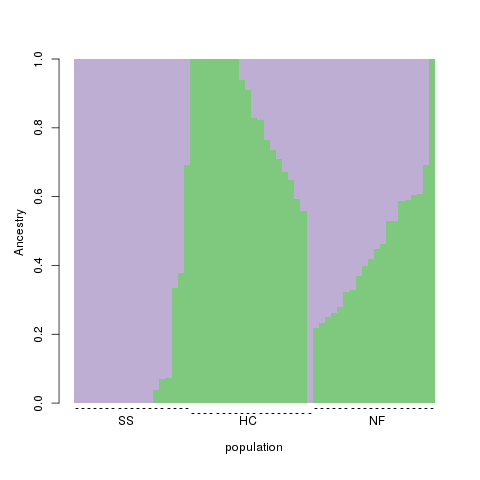

In [52]:
%%R
tbl=read.table("admix.7.2.Q")
inds=read.table("inds.list")
tbl$ind=inds$V1
tbl$pop=gsub("[0-9]","",as.character(inds$V1))
tbl$pop=gsub("-","",as.character(tbl$pop))
tbl$pop=gsub("[AB]","",as.character(tbl$pop))
tbl$pop=factor(tbl$pop,levels=c("SS","HC","NF"))
npops=2
p=levels(tbl$pop)[1]
tsort=c()
for(p in levels(tbl$pop)){
	s=subset(tbl,pop==p)
	probs=apply(s[,1:npops],2,sum)
	ord=order(probs,decreasing=T)
	if (npops>=5){so=s[order(s[,ord[1]],s[,ord[2]],s[,ord[3]],s[,ord[4]],s[,ord[5]],decreasing=T),]} 
	if (npops==4){ so=s[order(s[,ord[1]],s[,ord[2]],s[,ord[3]],s[,ord[4]],decreasing=T),]} 
	if (npops==3){ so=s[order(s[,ord[1]],s[,ord[2]],s[,ord[3]],decreasing=T),]} 
	if (npops==2) { so=s[order(s[,ord[1]],s[,ord[2]],decreasing=T),] }
	tsort=data.frame(rbind(tsort,so))
}

cols=brewer.pal(n=5,name="Accent")
midpts=barplot(t(as.matrix(tsort[1:npops])), col=cols,xlab="population", space=0,ylab="Ancestry", border=NA, xaxt="n",mgp=c(2.3,1,0))
popline(tsort$pop,midpts)

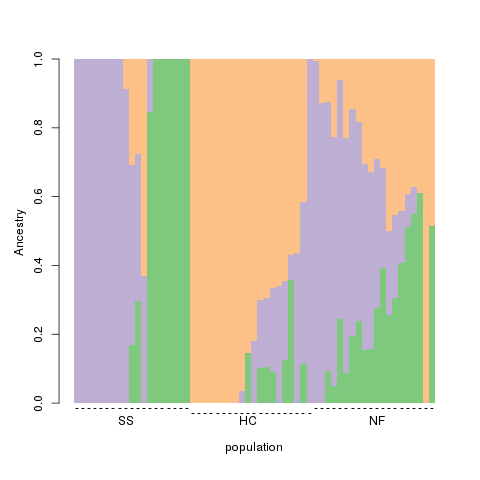

In [53]:
%%R
tbl=read.table("admix.7.3.Q")
inds=read.table("inds.list")
tbl$ind=inds$V1
tbl$pop=gsub("[0-9]","",as.character(inds$V1))
tbl$pop=gsub("-","",as.character(tbl$pop))
tbl$pop=gsub("[AB]","",as.character(tbl$pop))
tbl$pop=factor(tbl$pop,levels=c("SS","HC","NF"))
npops=3
p=levels(tbl$pop)[1]
tsort=c()
for(p in levels(tbl$pop)){
	s=subset(tbl,pop==p)
	probs=apply(s[,1:npops],2,sum)
	ord=order(probs,decreasing=T)
	if (npops>=5){so=s[order(s[,ord[1]],s[,ord[2]],s[,ord[3]],s[,ord[4]],s[,ord[5]],decreasing=T),]} 
	if (npops==4){ so=s[order(s[,ord[1]],s[,ord[2]],s[,ord[3]],s[,ord[4]],decreasing=T),]} 
	if (npops==3){ so=s[order(s[,ord[1]],s[,ord[2]],s[,ord[3]],decreasing=T),]} 
	if (npops==2) { so=s[order(s[,ord[1]],s[,ord[2]],decreasing=T),] }
	tsort=data.frame(rbind(tsort,so))
}

cols=brewer.pal(n=5,name="Accent")
midpts=barplot(t(as.matrix(tsort[1:npops])), col=cols,xlab="population", space=0,ylab="Ancestry", border=NA, xaxt="n",mgp=c(2.3,1,0))
popline(tsort$pop,midpts)